In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
import matplotlib.pyplot as plt
import numpy as np

c:\Users\juanl\miniconda3\envs\qiskit-tfm\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


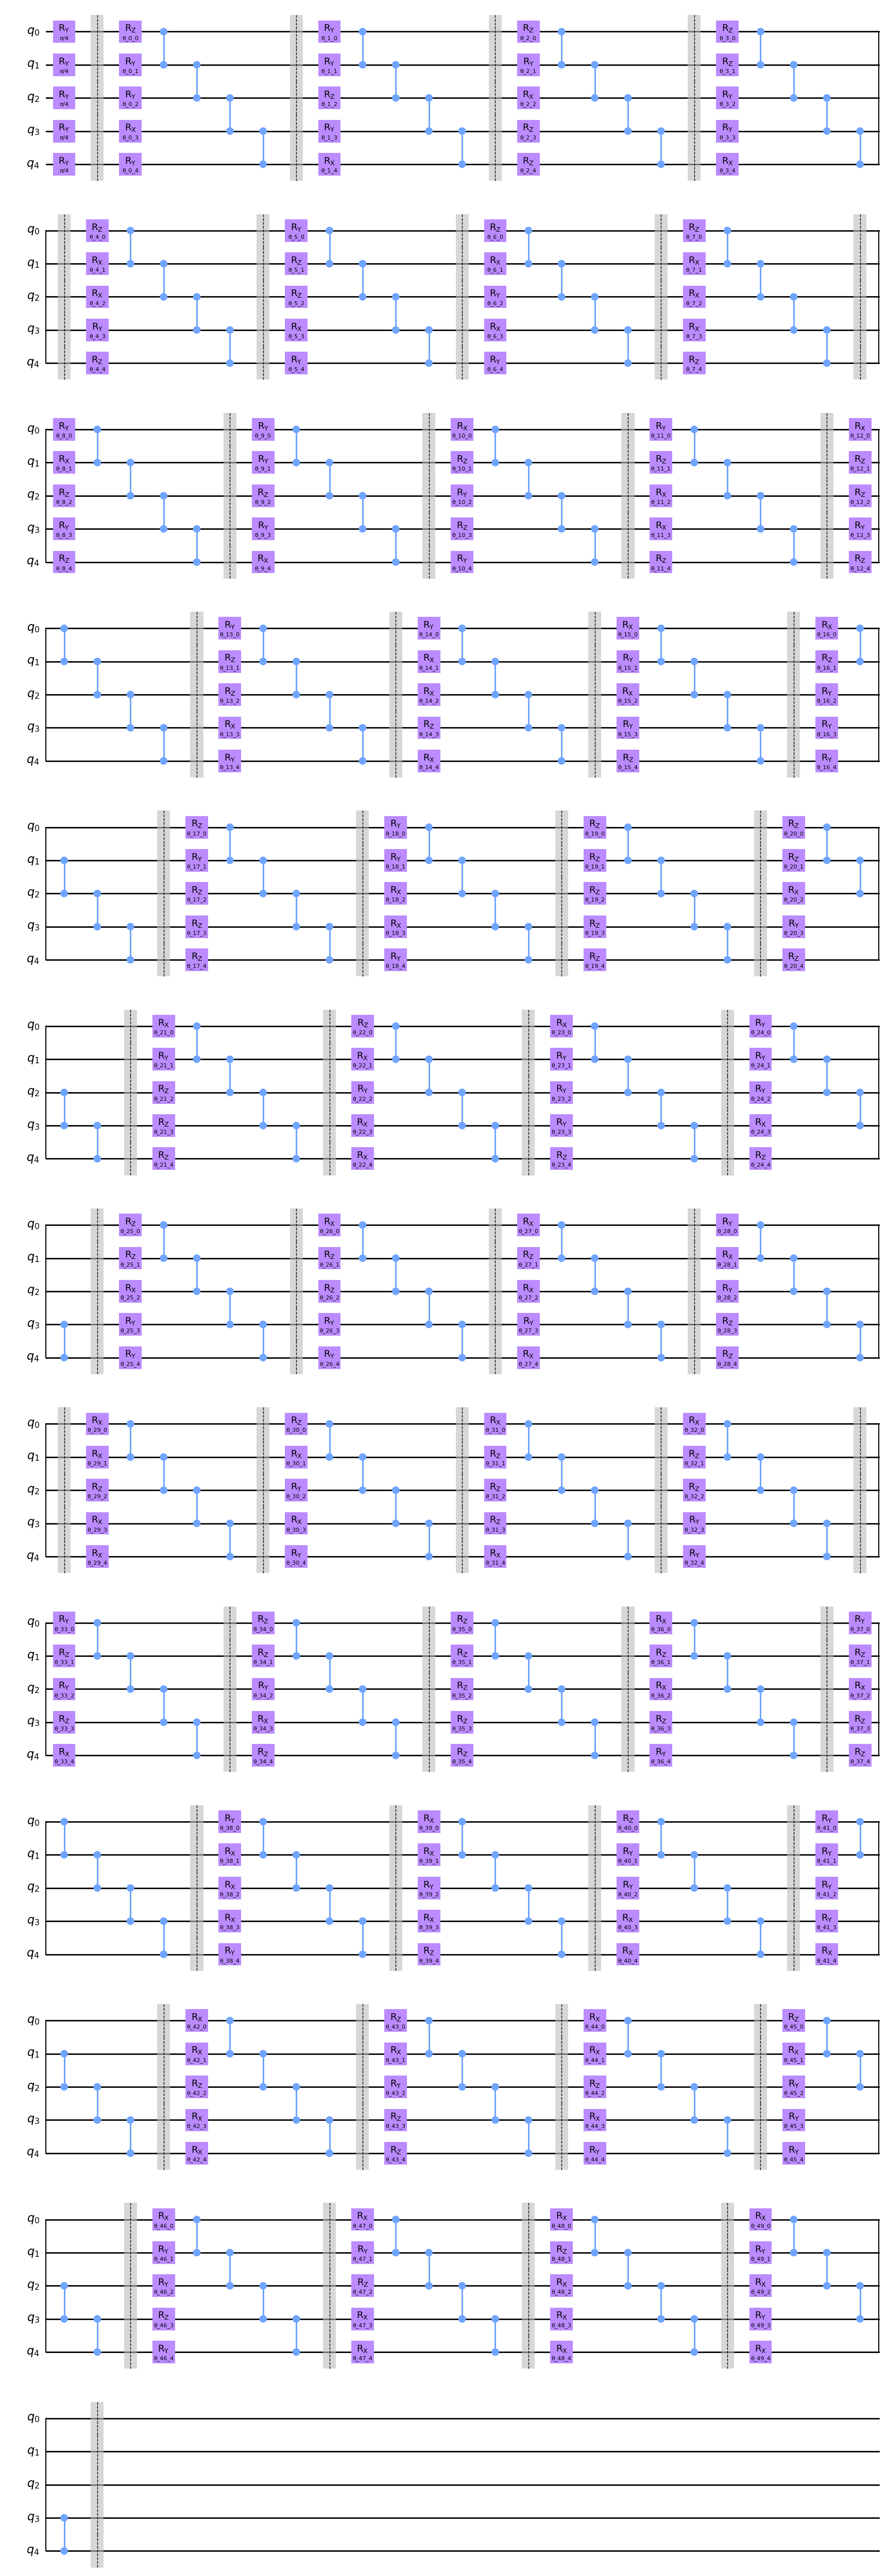

[[Parameter(θ_0_0), Parameter(θ_0_1), Parameter(θ_0_2), Parameter(θ_0_3), Parameter(θ_0_4)], [Parameter(θ_1_0), Parameter(θ_1_1), Parameter(θ_1_2), Parameter(θ_1_3), Parameter(θ_1_4)], [Parameter(θ_2_0), Parameter(θ_2_1), Parameter(θ_2_2), Parameter(θ_2_3), Parameter(θ_2_4)], [Parameter(θ_3_0), Parameter(θ_3_1), Parameter(θ_3_2), Parameter(θ_3_3), Parameter(θ_3_4)], [Parameter(θ_4_0), Parameter(θ_4_1), Parameter(θ_4_2), Parameter(θ_4_3), Parameter(θ_4_4)], [Parameter(θ_5_0), Parameter(θ_5_1), Parameter(θ_5_2), Parameter(θ_5_3), Parameter(θ_5_4)], [Parameter(θ_6_0), Parameter(θ_6_1), Parameter(θ_6_2), Parameter(θ_6_3), Parameter(θ_6_4)], [Parameter(θ_7_0), Parameter(θ_7_1), Parameter(θ_7_2), Parameter(θ_7_3), Parameter(θ_7_4)], [Parameter(θ_8_0), Parameter(θ_8_1), Parameter(θ_8_2), Parameter(θ_8_3), Parameter(θ_8_4)], [Parameter(θ_9_0), Parameter(θ_9_1), Parameter(θ_9_2), Parameter(θ_9_3), Parameter(θ_9_4)], [Parameter(θ_10_0), Parameter(θ_10_1), Parameter(θ_10_2), Parameter(θ_10_3), Pa

In [5]:
def build_deep_ansatz(num_qubits):
    """Crea un circuito con L = 10n capas de ansatz para n qubits."""
    L = 10 * num_qubits  # número de capas
    qc = QuantumCircuit(num_qubits)
    qc.ry(np.pi/4, range(num_qubits))
    qc.barrier()
    thetas = []

    def layer(qc, theta_list):
        # RX en cada qubit
        for i in range(num_qubits):
            aux = np.random.random()
            if aux < 1/3:
                qc.rx(theta_list[i], i)
            elif aux < 2/3:
                qc.ry(theta_list[i], i)
            else:
                qc.rz(theta_list[i], i)
        # CZ entre qubits adyacentes
        for i in range(num_qubits - 1):
            qc.cz(i, i + 1)

    for layer_index in range(L):
        theta_layer = [Parameter(f'θ_{layer_index}_{i}') for i in range(num_qubits)]
        thetas.append(theta_layer)
        layer(qc, theta_layer)
        qc.barrier()

    return qc, thetas

qc, theta_params = build_deep_ansatz(5)
display(qc.draw('mpl'))

print(theta_params)